# Convolution and Image Gradients

Importing the noisy image in "noisy_cat"

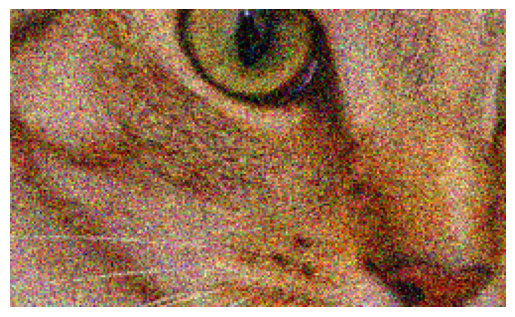

In [1]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

noisy_cat = imageio.imread('Data/noisy.png')

plt.figure()
plt.axis('off')
plt.imshow(noisy_cat)
plt.show()

Importing the convolution function (2)

In [2]:
import scipy.signal as signal

Average Kernal

In [3]:
import numpy as np

average = np.ones((3,3)) / 9

print(average)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Using the average filter on each channel within the noisy_cat images

In [ ]:
# Shape of noisy_cat
print(noisy_cat.shape)

(150, 250, 3)


In [ ]:
print(signal.convolve2d(noisy_cat[:,:,0], average, 'same').shape)

(150, 250)


In [6]:
average_cat = np.copy(noisy_cat)

average_cat[:,:,0] = (signal.convolve2d(noisy_cat[:,:,0], average, 'same'))
average_cat[:,:,1] = (signal.convolve2d(noisy_cat[:,:,1], average, 'same'))
average_cat[:,:,2] = (signal.convolve2d(noisy_cat[:,:,2], average, 'same'))

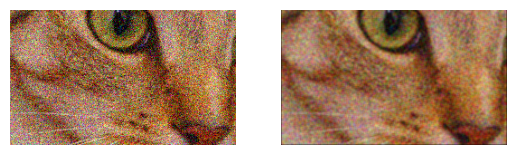

In [7]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(noisy_cat, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(average_cat, vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [8]:
def gauss_kernel(l=5, sig=1.):
    """
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)

    return kernel / np.sum(kernel)

In [9]:
gauss_kernel_5 = gauss_kernel()

gauss_cat = np.copy(noisy_cat)

gauss_cat[:,:,0] = (signal.convolve2d(noisy_cat[:,:,0], gauss_kernel_5, 'same'))
gauss_cat[:,:,1] = (signal.convolve2d(noisy_cat[:,:,1], gauss_kernel_5, 'same'))
gauss_cat[:,:,2] = (signal.convolve2d(noisy_cat[:,:,2], gauss_kernel_5, 'same'))

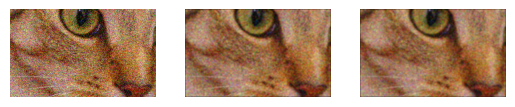

In [10]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(noisy_cat, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(average_cat, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gauss_cat, vmin=0, vmax=255)
plt.axis('off')

plt.show()

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [12]:
tiger_original = imageio.imread('Data/tiger.jpeg')

In [13]:
gray_tiger = rgb2gray(tiger_original)

In [14]:
laplacian_filter = np.array([[0,1,0], [1,-4,1],[0,1,0]])

In [15]:
laplace_tiger = np.copy(gray_tiger)

laplace_tiger = (signal.convolve2d(gray_tiger, laplacian_filter, 'same'))

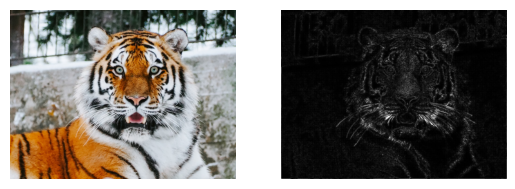

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(tiger_original, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.abs(laplace_tiger), cmap='gray',  vmin=0, vmax=255)
# plt.imshow(laplace_tiger, cmap='gray',  vmin=0, vmax=1)
plt.axis('off')
plt.show()

In [17]:
sobel_v = np.array([[-1,-2,-1], [0,0,0],[1,2,1]])
sobel_h = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])

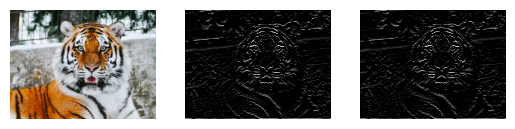

In [18]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(tiger_original, vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,3,2)
tiger_sobel_v = (signal.convolve2d(gray_tiger, sobel_v, 'same'))
plt.imshow(tiger_sobel_v, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,3,3)
tiger_sobel_h = (signal.convolve2d(gray_tiger, sobel_v, 'same'))
plt.imshow(tiger_sobel_h, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()